# BOUNDING BOX

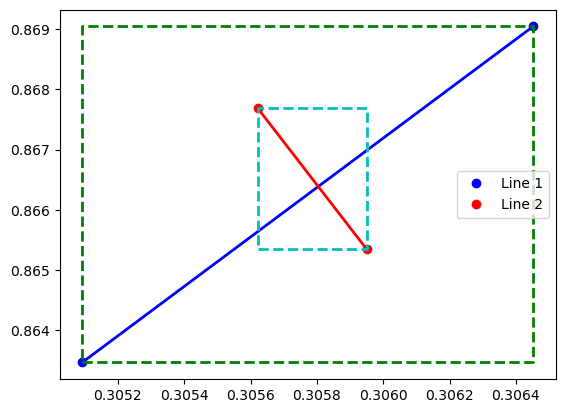

Lines intersect!
Elapsed Time: 1.021310806274414 seconds
Lines intersect!


In [11]:
import tkinter as tk
from tkinter import ttk
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import time

class BoundingBoxApp:
    def __init__(self, root):
        # Create the figure and axes
        self.fig, self.ax = plt.subplots()

        # Animation variables
        self.animation_running = False
        self.root = root
        self.root.title("Bounding Box Visualization")

        # Create GUI elements
        self.canvas = FigureCanvasTkAgg(self.fig, master=self.root)
        self.canvas.get_tk_widget().pack(side=tk.TOP, fill=tk.BOTH, expand=1)

        self.animation_button = ttk.Button(self.root, text="Animate", command=self.animate)
        self.animation_button.pack(side=tk.BOTTOM)

        # Initialize points and lines for Line 1 and Line 2
        self.points_line1 = []
        self.points_line2 = []
        self.lines1 = []
        self.lines2 = []

        # Connect mouse events for adding points and drawing lines
        self.canvas.mpl_connect('button_press_event', self.on_click)

    def on_click(self, event):
        if not self.animation_running:
            x, y = event.xdata, event.ydata
            if event.button == 1:  # Left mouse button for Line 1
                self.points_line1.append((x, y))
            elif event.button == 3:  # Right mouse button for Line 2
                self.points_line2.append((x, y))

            self.update_points()

    def update_points(self):
        self.ax.clear()

        # Plot Line 1 points in blue
        if len(self.points_line1) > 0:
            x1, y1 = zip(*self.points_line1)
            self.ax.plot(x1, y1, 'bo', label='Line 1')

            # Draw lines between the points for Line 1
            for i in range(len(self.points_line1) - 1):
                line_x = [self.points_line1[i][0], self.points_line1[i + 1][0]]
                line_y = [self.points_line1[i][1], self.points_line1[i + 1][1]]
                self.ax.plot(line_x, line_y, 'b-', linewidth=2)  # Draw lines in blue
                self.lines1.append((line_x, line_y))

        # Plot Line 2 points in red
        if len(self.points_line2) > 0:
            x2, y2 = zip(*self.points_line2)
            self.ax.plot(x2, y2, 'ro', label='Line 2')

            # Draw lines between the points for Line 2
            for i in range(len(self.points_line2) - 1):
                line_x = [self.points_line2[i][0], self.points_line2[i + 1][0]]
                line_y = [self.points_line2[i][1], self.points_line2[i + 1][1]]
                self.ax.plot(line_x, line_y, 'r-', linewidth=2)  # Draw lines in red
                self.lines2.append((line_x, line_y))

        self.ax.legend()
        self.canvas.draw()

    def animate(self):
        if len(self.points_line1) >= 2 and len(self.points_line2) >= 2 and not self.animation_running:
            # Record the start time
            start_time = time.time()

            self.animation_running = True
            anim = FuncAnimation(self.fig, self.animate_bounding_box, frames=1,
                                 interval=500, blit=False, repeat=False)
            self.canvas.draw()
            self.animation_button.configure(state='disabled')

            # Record the end time
            end_time = time.time()
            elapsed_time = end_time - start_time
            print(f"Elapsed Time: {elapsed_time} seconds")

    def animate_bounding_box(self, frame):
        # Animate the Bounding Box calculation
        if len(self.points_line1) >= 2 and len(self.points_line2) >= 2:
            x1, y1 = zip(*self.points_line1)
            x2, y2 = zip(*self.points_line2)

            # Calculate bounding box for Line 1
            min_x1 = min(x1)
            max_x1 = max(x1)
            min_y1 = min(y1, default=0)
            max_y1 = max(y1, default=0)

            bbox_x1 = [min_x1, max_x1, max_x1, min_x1, min_x1]
            bbox_y1 = [min_y1, min_y1, max_y1, max_y1, min_y1]

            # Calculate bounding box for Line 2
            min_x2 = min(x2)
            max_x2 = max(x2)
            min_y2 = min(y2, default=0)
            max_y2 = max(y2, default=0)

            bbox_x2 = [min_x2, max_x2, max_x2, min_x2, min_x2]
            bbox_y2 = [min_y2, min_y2, max_y2, max_y2, min_y2]

            self.ax.plot(bbox_x1, bbox_y1, 'g--', linewidth=2)  # Animate the Bounding Box for Line 1 in green
            self.ax.plot(bbox_x2, bbox_y2, 'c--', linewidth=2)  # Animate the Bounding Box for Line 2 in cyan

            self.canvas.draw()
            plt.pause(0.5)  # Pause to observe the animation

            # Check if lines are intersecting
            if self.lines_intersect():
                self.show_prompt("Lines do not intersect!")
            else:
                self.show_prompt("Lines intersect!")

    def lines_intersect(self):
        # Check if Line 1 and Line 2 intersect
        for i in range(len(self.lines1) - 1):
            for j in range(len(self.lines2) - 1):
                line1_coords = self.lines1[i]
                line2_coords = self.lines2[j]
                line3_coords = self.lines1[i + 1]
                line4_coords = self.lines2[j + 1]

                if self.do_lines_intersect(line1_coords, line2_coords, line3_coords, line4_coords):
                    return True
        return False




    def do_lines_intersect(self, line1, line2, line3, line4):
        x1, y1 = line1
        x2, y2 = line2
        x3, y3 = line3
        x4, y4 = line4

        # Check if the two line segments intersect
        ccw1 = self.ccw(x1, y1, x2, y2, x3, y3)
        ccw2 = self.ccw(x1, y1, x2, y2, x4, y4)
        ccw3 = self.ccw(x3, y3, x4, y4, x1, y1)
        ccw4 = self.ccw(x3, y3, x4, y4, x2, y2)

        return ccw1 * ccw2 <= 0 and ccw3 * ccw4 <= 0

    def ccw(self, x1, y1, x2, y2, x3, y3):
        return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    def show_prompt(self, message):
        # Display a prompt message
        self.root.title(message)
        print(message)

if __name__ == "__main__":
    root = tk.Tk()
    app = BoundingBoxApp(root)
    root.mainloop()


# CCW METHOD

In [9]:
import tkinter as tk
from tkinter import ttk

class LineIntersectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Line Intersection Checker With CCW")

        # Create GUI elements
        self.canvas = tk.Canvas(root, width=400, height=400, bg="white")
        self.canvas.pack(expand=tk.YES, fill=tk.BOTH)
        
        self.intersection_button = ttk.Button(root, text="Check Intersection", command=self.check_intersection)
        self.intersection_button.pack(side=tk.LEFT)
        
        self.reset_button = ttk.Button(root, text="Reset", command=self.reset_canvas)
        self.reset_button.pack(side=tk.RIGHT)

        self.result_label = tk.Label(root, text="", font=("Helvetica", 12, "bold"), fg="blue")
        self.result_label.pack(side=tk.TOP, pady=5)

        # List to store points and lines
        self.points = []
        self.lines = []
        self.intersection_dot = None

        # Bind mouse click event to canvas
        self.canvas.bind("<Button-1>", self.on_canvas_click)

    def on_canvas_click(self, event):
        # Add point to the canvas
        x, y = event.x, event.y
        self.canvas.create_oval(x - 3, y - 3, x + 3, y + 3, fill="black")
        self.points.append((x, y))

        # If two points are clicked, draw a line
        if len(self.points) == 2:
            self.draw_line()
            self.points = []

    def draw_line(self):
        x1, y1 = self.points[0]
        x2, y2 = self.points[1]
        line_id = self.canvas.create_line(x1, y1, x2, y2, fill="blue", width=2)
        self.lines.append(line_id)

    def check_intersection(self):
        # Check if lines are intersecting
        if len(self.lines) >= 2:
            line1_coords = self.canvas.coords(self.lines[-2])
            line2_coords = self.canvas.coords(self.lines[-1])
            if self.lines_intersect(line1_coords, line2_coords):
                intersection_point = self.calculate_intersection_point(line1_coords, line2_coords)
                self.animate_intersection(intersection_point)
                self.display_result("Lines intersect!")
            else:
                self.display_result("Lines do not intersect.")

    def lines_intersect(self, line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2

        # Check for intersection using CCW formula
        ccw1 = self.ccw(x1, y1, x2, y2, x3, y3)
        ccw2 = self.ccw(x1, y1, x2, y2, x4, y4)
        ccw3 = self.ccw(x3, y3, x4, y4, x1, y1)
        ccw4 = self.ccw(x3, y3, x4, y4, x2, y2)

        return ccw1 * ccw2 <= 0 and ccw3 * ccw4 <= 0

    def ccw(self, x1, y1, x2, y2, x3, y3):
        return (x2 - x1) * (y3 - y1) - (y2 - y1) * (x3 - x1)

    def calculate_intersection_point(self, line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2

        # Calculate the intersection point of two lines
        m1 = (y2 - y1) / (x2 - x1) if x2 - x1 != 0 else float('inf')
        b1 = y1 - m1 * x1

        m2 = (y4 - y3) / (x4 - x3) if x4 - x3 != 0 else float('inf')
        b2 = y3 - m2 * x3

        if m1 == m2:
            # Parallel lines, no intersection point
            return None

        x_intersection = (b2 - b1) / (m1 - m2)
        y_intersection = m1 * x_intersection + b1

        return x_intersection, y_intersection

    def animate_intersection(self, intersection_point):
        if intersection_point:
            x, y = intersection_point
            self.intersection_dot = self.canvas.create_oval(x - 5, y - 5, x + 5, y + 5, outline="red", width=2)

            # Add a zoom-in effect
            for _ in range(10):
                self.canvas.scale(self.intersection_dot, x, y, 1.2, 1.2)
                self.canvas.update()
                self.root.after(50)

    def display_result(self, message):
        # Display the result on the canvas
        self.result_label.config(text=message)

    def reset_canvas(self):
        # Clear canvas and reset points, lines, and intersection dot
        self.canvas.delete("all")
        self.points = []
        self.lines = []
        if self.intersection_dot:
            self.canvas.delete(self.intersection_dot)
            self.intersection_dot = None
        self.result_label.config(text="Canvas Reset")

if __name__ == "__main__":
    root = tk.Tk()
    app = LineIntersectionApp(root)
    root.mainloop()


# LINE BY LINE 

In [8]:
import tkinter as tk

class LineIntersectionApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Line Intersection Checker")

        self.canvas = tk.Canvas(root, width=600, height=600, bg='white')
        self.canvas.pack()

        self.points = []
        self.lines = []

        self.intersection_button = tk.Button(root, text="Check Intersection", command=self.check_intersection)
        self.intersection_button.pack(side=tk.LEFT, padx=10)

        self.reset_button = tk.Button(root, text="Reset", command=self.reset_lines)
        self.reset_button.pack(side=tk.LEFT, padx=10)

        self.canvas.bind("<Button-1>", self.on_click)

    def on_click(self, event):
        x, y = event.x, event.y
        self.points.append((x, y))
        self.draw_coordinate(x, y)

        if len(self.points) % 2 == 0:
            # Draw a line between the last two points
            self.draw_line(self.points[-2], self.points[-1])

    def draw_coordinate(self, x, y):
        self.canvas.create_oval(x - 3, y - 3, x + 3, y + 3, fill='black')

    def draw_line(self, start, end):
        line_color = "#{:06x}".format(hash(tuple(start + end)) % (1 << 24))  # Generate a unique color for the line
        line = self.canvas.create_line(start, end, fill=line_color, width=2)
        self.lines.append(line)

    def check_intersection(self):
        if len(self.lines) >= 2:
            line1_coords = self.canvas.coords(self.lines[-2])
            line2_coords = self.canvas.coords(self.lines[-1])

            if self.do_lines_intersect(line1_coords, line2_coords):
                print("Lines intersect!")
                self.canvas.create_text(300, 20, text="Lines intersect!", fill='green')
            else:
                print("Lines do not intersect.")
                self.canvas.create_text(300, 20, text="Lines do not intersect.", fill='red')

    def reset_lines(self):
        self.points = []
        self.lines = []
        self.canvas.delete("all")

    def ccw(self, A, B, C):
        return (C[1] - A[1]) * (B[0] - A[0]) > (B[1] - A[1]) * (C[0] - A[0])

    def do_lines_intersect(self, line1, line2):
        x1, y1, x2, y2 = line1
        x3, y3, x4, y4 = line2

        return self.ccw((x1, y1), (x3, y3), (x4, y4)) != self.ccw((x2, y2), (x3, y3), (x4, y4)) and \
               self.ccw((x1, y1), (x2, y2), (x3, y3)) != self.ccw((x1, y1), (x2, y2), (x4, y4))

if __name__ == "__main__":
    root = tk.Tk()
    app = LineIntersectionApp(root)
    root.mainloop()


Lines do not intersect.
Lines intersect!
